In [6]:
import numpy as np
import matplotlib.pyplot as plt

# This solves for the pseudoinverse of the X to find the least squares
# estimate.
def LSE(X, y):  
    Xt = np.transpose(X)
    XtX = np.dot(Xt,X)
    Xty = np.dot(Xt,y)
    return np.linalg.solve(XtX,Xty) # XtX B = Xty, B = (XtX)^-1 Xty

# This finds the sum of squared error between the actual and predicted
# values.
def SSE(X, y):
    param = LSE(X,y)
    error = y - np.dot(X, param)
    return np.dot(np.transpose(error), error)

# This finds the R^2 value for a linear regression model.
def R2(X, y):
    param = LSE(X,y)
    sum_error = SSE(X, y)
    Syy = np.sum((y-np.mean(y))**2)
    return 1 - (sum_error/Syy)

# This finds the adjusted R^2 value for a linear regression model. Note
# that it accounts for the differing degrees of freedom.
def adjR2(X, y):
    param = LSE(X,y)
    sum_error = SSE(X, y)
    Syy = np.sum((y-np.mean(y))**2)
    return 1 - ( (sum_error/(X.shape[0]-param.shape[0])) / (Syy/(X.shape[0]-1)) )

The parameters for the first equation are: 
[2.31153333 4.87836   ]
The R^2 value is: 
0.8400764774816147
The adjusted R^2 value is: 
0.8172302599789882


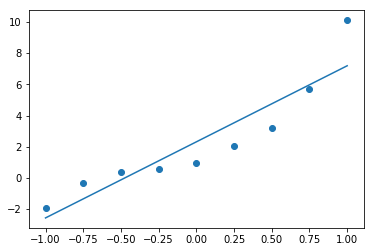

The parameters for the second equation are: 
[1.04922165 4.87836    3.02954805]
The R^2 value is: 
0.944022124370357
The adjusted R^2 value is: 
0.9253628324938095


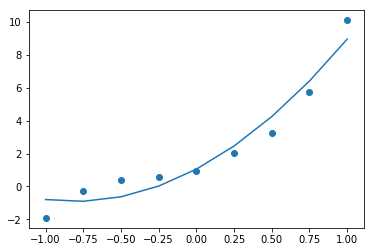

The parameters for the third equation are: 
[1.04922165 1.86463603 3.02954805 4.08640539]
The R^2 value is: 
0.9987313414210092
The adjusted R^2 value is: 
0.9979701462736146


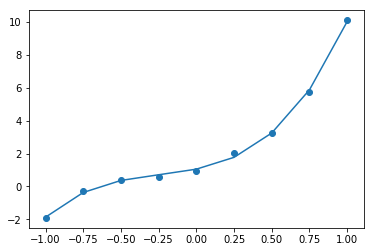

The parameters for the last equation are: 
[1.0628655  1.86463603 2.91332261 4.08640539 0.11319347]
The R^2 value is: 
0.9987421690456303
The adjusted R^2 value is: 
0.9974843380912605


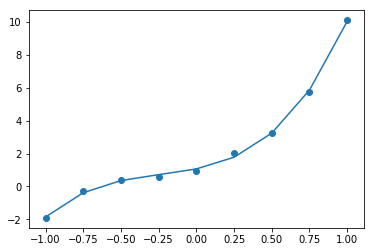

In [73]:
# Problem 16.16

x = np.array([-1., -.75, -.5, -.25, 0., .25, .5, .75, 1.])
y = np.array([-1.9029, -0.2984, 0.4047, 0.5572, 0.9662, 2.0312, 3.2286,
              5.7220, 10.0952])

ones = np.ones(x.shape)

x1 = np.array([ones, x])
x1 = np.transpose(x1)

x2 = np.array([ones, x, x**2])
x2 = np.transpose(x2)

x3 = np.array([ones, x, x**2, x**3])
x3 = np.transpose(x3)

x4 = np.array([ones, x, x**2, x**3, x**4])
x4 = np.transpose(x4)

print("The parameters for the first equation are: ")
print(LSE(x1, y))

print("The R^2 value is: ")
print(R2(x1, y))

print("The adjusted R^2 value is: ")
print(adjR2(x1, y))

plt.scatter(x, y)
plt.plot(x, np.dot(x1, LSE(x1, y)))
plt.show()

print("The parameters for the second equation are: ")
print(LSE(x2, y))

print("The R^2 value is: ")
print(R2(x2, y))

print("The adjusted R^2 value is: ")
print(adjR2(x2, y))

plt.scatter(x, y)
plt.plot(x, np.dot(x2, LSE(x2, y)))
plt.show()

print("The parameters for the third equation are: ")
print(LSE(x3, y))

print("The R^2 value is: ")
print(R2(x3, y))

print("The adjusted R^2 value is: ")
print(adjR2(x3, y))

plt.scatter(x, y)
plt.plot(x, np.dot(x3, LSE(x3, y)))
plt.show()

print("The parameters for the last equation are: ")
print(LSE(x4, y))

print("The R^2 value is: ")
print(R2(x4, y))

print("The adjusted R^2 value is: ")
print(adjR2(x4, y))

plt.scatter(x, y)
plt.plot(x, np.dot(x4, LSE(x4, y)))
plt.show()

As the cubic model has the highest adjusted R-squared value, we know that it is the most efficient model among the four without overfitting.

In [117]:
# Problem 16.23

X = np.array([8, 8, 4, 6, 6, 16, 8, 8, 10, 12, 4, 12, 
              4, 4, 12, 6, 4, 6, 6, 4])

X = np.array([np.ones(X.shape), X])
X = np.transpose(X)

city = np.array([13, 13, 22, 19, 15, 8, 14, 15, 13, 11, 18, 8, 21, 21,
                11, 17, 19, 18, 19, 19])

high = np.array([20, 19, 29, 28, 23, 14, 21, 24, 22, 15, 25, 13,
                27, 28, 18, 24, 25, 28, 28, 28])

print("The regression model for city gas mileage is %f + %f*x" % (LSE(X, city)[0], LSE(X, city)[1]))
print("The regression model for highway gas mileage is %f + %f*x" % (LSE(X, high)[0], LSE(X, high)[1]))

The regression model for city gas mileage is 24.179715 + -1.145907*x
The regression model for highway gas mileage is 32.647687 + -1.310498*x


The regression model is -1216.143887 + 2.398930*x + -0.000450*x^2


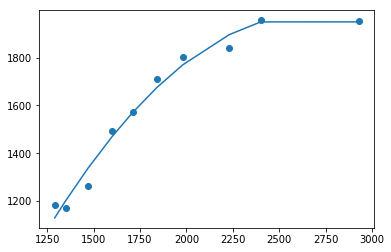

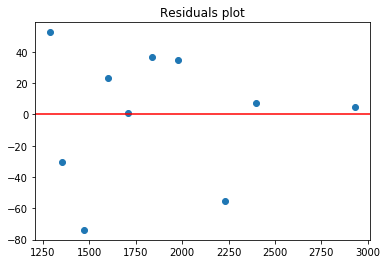

In [140]:
# Problem 16.25

X = np.array([1.29, 1.35, 1.47, 1.6, 1.71, 1.84, 1.98, 2.23, 2.4, 2.93])
X = X*1000
y = np.array([1182, 1172, 1264, 1493, 1571, 1711, 1804, 1840, 1956, 1954])

ones = np.ones(X.shape)

x = np.array([ones, X, X**2])
x = np.transpose(x)

params = LSE(x, y)

print("The regression model is %f + %f*x + %f*x^2" 
      % (params[0], params[1], params[2]))

plt.scatter(X, y)
plt.plot(X, np.dot(x3, params))
plt.show()

plt.scatter(X, y - np.dot(x3, params))
plt.axhline(color="red")
plt.title("Residuals plot")
plt.show()

In [19]:
# Problem 16.35

M = np.array([407000, 135000, 1613, 5740, 14280, 10000,
             611, 11050, 225, 11.50, 96.10, 16.90, 148.00,
             61., 30600, 45190, 7.50, 1329, 25000., 3672000])

M = M / 1000

Q = np.array([229.18, 104.15, 4.90, 5.11, 12.54, 14.98, 2.27,
             16.80, 1.39, .24, .80, .11, .78, .40, 14.65,
             17.05, .12, 3.44, 14.08, 2336.50])

# After a log transform, ln Q = ln theta_0 + theta_1 * ln M

ln_M = np.log(M)
ln_Q = np.log(Q)

new_ln_M = np.array([np.ones(ln_M.shape), ln_M])
new_ln_M = np.transpose(new_ln_M)

params = LSE(new_ln_M, ln_Q)

theta_0 = np.exp(params[0])
theta_1 = params[1]

print(theta_0)
print(theta_1)

2.8419381781281516
0.6852577375064095
